# ***Installation of libraries***

In [ ]:
!pip install smt


     |████████████████████████████████| 248 kB 4.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 47 kB 3.7 MB/s 
  Created wheel for smt: filename=smt-1.0.0-cp37-cp37m-linux_x86_64.whl size=522147 sha256=881ed56a972d2ee3115f401c95e41b0c7107f07ba1c7a68c980915f563617765
  Stored in directory: /root/.cache/pip/wheels/42/e6/ef/c78c5dc521a6d99898ea8842ffcdfb4d8854f39af1a438bc7a
  Created wheel for pyDOE2: filename=pyDOE2-1.3.0-py3-none-any.whl size=25538 sha256=51f330419f3172db2afcbfb75bbd549a3a5d0c80f71a8b7040bb7ae9a89f7056
  Stored in directory: /root/.cache/pip/wheels/49/91/2d/d08e80806bf7756193541f6c03c0492af288fcd6158d3d0998
Successfully built smt pyDOE2


In [ ]:
!pip install xgboost

In [ ]:
import numpy as np
import math

# ***Test functions*** 

In [ ]:
def q_5(x):
  a=np.array([1.0,1.2,3.0,3.2])
  A=np.array([[3.0,10,30],[0.1,10,35],[3.0,10,30],[0.1,10,35]])
  p=np.array([[0.3689,0.1170,0.2673,],[0.4699,0.4387,0.7470],[0.1091,0.8732,0.5547],[0.0381,0.5743,0.8828]])
  fun_exp=np.zeros((len(x),1))
  for k in range(len(x)):
    sum=0  #sum: sum of the terms for i=1to4 in the question
    for i in range(4):
      sum_1=0  #sum_1: for j=1to3 in the question 
      for j in range(3):
        sum_1= sum_1+A[i,j]*(x[k,j]-p[i,j])**2
      sum=sum+a[i]*math.exp((-1)*sum_1)
    fun_exp[k]=(-1)*sum
  return fun_exp
#q_6
def q_6(x):
  a=np.array([1.0,1.2,3.0,3.2])
  A=np.array([[10.0,0.05,3.0,17.0],[3,10,3.5,8],[17,17,1.7,0.05],[3.5,0.1,10,10]])
  p=np.array([[0.1312,0.2329,0.2348,0.4047],[0.1696,0.4135,0.1451,0.8828],[0.5569,0.8307,0.3522,0.8732],[0.0124,0.3736,0.2883,0.5743]])
  fun_exp=np.zeros((len(x),1))
  for k in range(len(x)):
    sum=0
    for i in range(4):
      sum_1=0
      for j in range(4):
        sum_1=sum_1+A[j,i]*(x[k,j]-p[j,i])**2
      sum=sum+a[i]*math.exp((-1)*sum_1)
    fun_exp[k]=(1/0.839)*(1.1-sum)
  return fun_exp
#q_11
def q_11(x):
  fun_exp=np.zeros((len(x),1))
  for i in range(len(x)):
    m=x[i,0]
    s=x[i,1]
    v0=x[i,2]
    k=x[i,3]
    p0=x[i,4]
    t=x[i,5]
    t0=x[i,6]
    A=p0*s+19.62*m-(k*v0/s)
    v=(s/(2*k))*(math.sqrt((A**2)+(4*k*p0*v0*t/t0)-A))
    fun_exp[i]=2*math.pi*(math.sqrt(m/(k+(s**2)*p0*v0*t/(t0*(v**2)))))
  return fun_exp
#q_12
def q_12(theta):
  fun_exp=np.zeros((len(theta),1))
  for i in range(len(theta)):
    def u():
      sum=0
      for j in range(4):
        sum_1=0
        for k in range(4,j+4):
          sum_1=sum_1+theta[i,k]
        sum=sum+theta[i,j+4]*math.cos(sum_1)
      return sum
    def v():
      sum=0
      for j in range(4):
        sum_1=0
        for k in range(4,j+4):
          sum_1=sum_1+theta[i,k]
        sum=sum+theta[i,j+4]*math.sin(sum_1)
      return sum
    fun_exp[i]=math.sqrt((u())**2+(v())**2)
  return fun_exp
#q_17
def q_17(x):
  fun_exp=np.zeros((len(x),1))
  for k in range(len(x)):
    sum=0
    for i in range(13):
      sum=sum+(i+2)*(2*(x[k,i+1])**2-x[k,i])**2
    fun_exp[k]= (x[k,0]-1)**2+sum
  return fun_exp
#q_18
def q_18(x):
  fun_exp=np.zeros((len(x),1))
  for k in range(len(x)):
    sum=0
    for i in range(17):
      sum=sum+100*(x[k,i+1]-(x[k,i])**2)**2+(x[k,i]-1)**2
    fun_exp[k]=sum
  return fun_exp





# ***Generation of DoE***

In [ ]:
from smt.sampling_methods import LHS
def generate_data(bounds, n_doe, test_func):
  sampling=LHS(xlimits=bounds,criterion='m')
  data_x=sampling(n_doe)
  data_y=test_func(data_x)
  return data_x, data_y
  

## ***Meta Models***

In [ ]:
def group_1_srgts(train_data):
  data_x=train_data[0]
  data_y=train_data[1]
  from metamodels import prs_srgt
  srgt_prs= prs_srgt(data_x, data_y, degree = 2)
  from metamodels import rbf_srgt
  srgt_rbf= rbf_srgt(data_x, data_y, sigma =100)
  from metamodels import kriging_srgt
  srgt_kriging= kriging_srgt(data_x, data_y, poly='constant', corr='squar_exp', theta=[0.01])
  from metamodels import svr_srgt
  srgt_svr=svr_srgt(data_x, data_y,kernel='rbf',C=100,degree =2,epsilon=0.02)
  from metamodels import gbm_srgt
  srgt_gbm = gbm_srgt(data_x,data_y,params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,'learning_rate': 0.01, 'loss': 'ls'})
  from metamodels import elastic_net_srgt
  srgt_elastic_net= elastic_net_srgt(data_x,data_y,degree = 2, l1_ratios = [0.1, 0.5, 0.9], alphas = (0.1,1.0,10.0))
  from metamodels import xgboost_srgt
  srgt_xgboost=xgboost_srgt(data_x,data_y)
  list=np.array([srgt_prs, srgt_rbf, srgt_kriging, srgt_svr, srgt_gbm, srgt_elastic_net, srgt_xgboost])
  return list


## ***Defining the Metrics***

In [ ]:
# Function to compute error metrics for different surrogates
def metrics(test_data_x,test_data_y,srgt):
  import numpy as np
  test_data_y_range = np.max(test_data_y)-np.min(test_data_y)  
  
  # For RBF and KRG
  if (srgt==srgt_rbf or srgt==srgt_krg):
    test_ypred = np.concatenate(srgt.predict_values(test_data_x))
    rmse = math.sqrt(np.mean((test_ypred-test_data_y)**2))
    nrmse = rmse/test_data_y_range

  # For remaining surrogates
  else:
    test_ypred = srgt.predict(test_data_x)
    rmse = math.sqrt(np.mean((test_ypred-test_data_y)**2))
    nrmse = rmse/test_data_y_range
  return nrmse

In [ ]:
def grp_1_metrics(test_data):
  test_data_x=test_data[0]
  test_data_y=test_data[1]
  nrmse_prs=metrics(test_data_x,test_data_y,srgt_prs)
  nrmse_rbf=metrics(test_data_x,test_data_y,srgt_rbf)
  nrmse_krg=metrics(test_data_x,test_data_y,srgt_krg)
  nrmse_elastic_net=metrics(test_data_x,test_data_y,srgt_elastic_net)
  nrmse_svr=metrics(test_data_x,test_data_y,srgt_svr)
  nrmse_gbm=metrics(test_data_x,test_data_y,srgt_gbm)
  nrmse_xgb=metrics(test_data_x,test_data_y,srgt_xgb)
  nrmse_group_1=[nrmse_prs,nrmse_rbf,nrmse_krg,nrmse_elastic_net,nrmse_svr,nrmse_gbm,nrmse_xgb]
  return nrmse_group_1


# ***Solution of small Scale models***
Q_5

In [ ]:
bounds=np.array([[0,1],[0,1],[0,1]])
n_doe=30 #n_doe=10*n, (n= number of input dimension= 3)
n_test_doe=1000
train_data=generate_data(bounds,n_doe,q_5) #q_5=test function for question 5
test_data=generate_data(bounds,n_test_doe,q_5)
srgts=group_1_srgts(train_data)
srgt_prs=srgts[0]
srgt_rbf=srgts[1]
srgt_krg=srgts[2]
srgt_elastic_net=srgts[5]
srgt_svr=srgts[3]
srgt_gbm=srgts[4]
srgt_xgb=srgts[6]
grp_1_metrics(test_data)


Q_6

In [ ]:
bounds=np.array([[0,1],[0,1],[0,1],[0,1]])
n_doe=40 #n_doe=10*n, (n= number of input dimension= 4)
n_test_doe=1000
train_data=generate_data(bounds,n_doe,q_6)
srgts=group_1_srgts(train_data)
test_data=generate_data(bounds,n_test_doe,q_6)
srgt_prs=srgts[0]
srgt_rbf=srgts[1]
srgt_krg=srgts[2]
srgt_elastic_net=srgts[5]
srgt_svr=srgts[3]
srgt_gbm=srgts[4]
srgt_xgb=srgts[6]
grp_1_metrics(test_data)


# ***solution of medium scale models***
Q_11

In [ ]:
bounds=np.array([[30,60],[0.005,0.02],[0.002,0.01],[1000,5000],[9*10**4,11*10**4],[290,296],[340,360]])
n_doe=70 #n_doe=10*n, (n= number of input dimension= 7)
n_test_doe=1500
train_data=generate_data(bounds,n_doe,q_11)
train_data
srgts=group_1_srgts(train_data)
test_data=generate_data(bounds,n_test_doe,q_11)
srgt_prs=srgts[0]
srgt_rbf=srgts[1]
srgt_krg=srgts[2]
srgt_elastic_net=srgts[5]
srgt_svr=srgts[3]
srgt_gbm=srgts[4]
srgt_xgb=srgts[6]
grp_1_metrics(test_data)

q_12

In [ ]:
pie=math.pi
x=[0,2*pie]
l=[0,1]
bounds=np.array([x,x,x,x,l,l,l,l])
n_doe=80 #n_doe=10*n, (n= number of input dimension= 8)
n_test_doe=1500
train_data=generate_data(bounds,n_doe,q_12)
srgts=group_1_srgts(train_data)
test_data=generate_data(bounds,n_test_doe,q_12)
srgt_prs=srgts[0]
srgt_rbf=srgts[1]
srgt_krg=srgts[2]
srgt_elastic_net=srgts[5]
srgt_svr=srgts[3]
srgt_gbm=srgts[4]
srgt_xgb=srgts[6]
grp_1_metrics(test_data)

# ***Large scale model solution***
Q_17

In [ ]:
l=[-10,10]
bounds=np.array([l,l,l,l,l,l,l,l,l,l,l,l,l,l])
n_doe=140 #n_doe=10*n, (n= number of input dimension= 14)
n_test_doe=2000
train_data=generate_data(bounds,n_doe,q_17)
train_data
srgts=group_1_srgts(train_data)
test_data=generate_data(bounds,n_test_doe,q_17)
srgt_prs=srgts[0]
srgt_rbf=srgts[1]
srgt_krg=srgts[2]
srgt_elastic_net=srgts[5]
srgt_svr=srgts[3]
srgt_gbm=srgts[4]
srgt_xgb=srgts[6]
grp_1_metrics(test_data)

Q_18

In [ ]:
l=[-5,10]
bounds=np.array([l,l,l,l,l,l,l,l,l,l,l,l,l,l,l,l,l,l])
n_doe=180 #n_doe=10*n, (n= number of input dimension= 18)
n_test_doe=2000
train_data=generate_data(bounds,n_doe,q_18)
srgts=group_1_srgts(train_data)
test_data=generate_data(bounds,n_test_doe,q_18)
srgt_prs=srgts[0]
srgt_rbf=srgts[1]
srgt_krg=srgts[2]
srgt_elastic_net=srgts[5]
srgt_svr=srgts[3]
srgt_gbm=srgts[4]
srgt_xgb=srgts[6]
grp_1_metrics(test_data)

## ***Plotting the Metrics of the Metamodels***

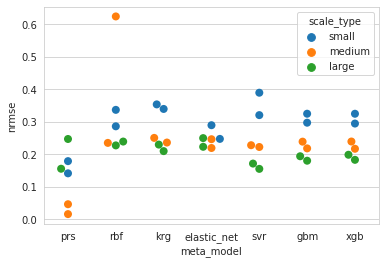

In [ ]:
# The data are plotted against 6 test functions.
#Each two from these six functions are small,medium and large scale problems respectively.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
srgt_list=['prs','rbf','krg','elastic_net','svr','gbm','xgb','prs','rbf','krg','elastic_net','svr','gbm','xgb','prs','rbf','krg','elastic_net','svr','gbm','xgb','prs','rbf','krg','elastic_net','svr','gbm','xgb','prs','rbf','krg','elastic_net','svr','gbm','xgb','prs','rbf','krg','elastic_net','svr','gbm','xgb']
scale=['small','small','small','small','small','small','small','small','small','small','small','small','small','small','medium','medium','medium','medium','medium','medium','medium','medium','medium','medium','medium','medium','medium','medium','large','large','large','large','large','large','large','large','large','large','large','large','large','large']
nrmse_list=[0.1787,0.3364,0.3532,0.2892,0.3891,0.3245,0.3244,0.1412,0.2858,0.3392,0.2471,0.3202,0.2969,0.2943,0.0462,0.6237,0.2502,0.2461,0.2277,0.2386,0.2390,0.0158,0.2348,0.2359,0.2191,0.2222,0.2179,0.2167,0.1553,0.2389,0.2296,0.2495,0.1712,0.1937,0.1983,0.2468,0.2271,0.2095,0.2228,0.1549,0.1800,0.1827]
df=pd.DataFrame({'meta_model':srgt_list,'nrmse':nrmse_list,'scale_type':scale})
sns.set_style("whitegrid")
sns.swarmplot(x="meta_model",y="nrmse",hue="scale_type",data=df,size=8)

# **performance of metamodels**
1.for small scale functions with less number of DOEs all the models are having fairly higher nmrse with exception seen in polynomial response surface model. so prs performs well for small scale problem with less DOEs.  

2.Elastic net model has same value of nrmse irrespective of the scale of the problems.  

3.PRS performs well with low nrmse for medium scale problem. Other models perform better when scale of the problems are large.